### Obrada i analiza meteoroloških podataka za Rijeku

U ovome projektu cilj je bio analizirati i obraditi meteorološle podatke. Podaci su mjerenja vremenskih parametara sa mjerne postaje Kozala u Rijeci. Podaci su preuzeti sa noaa stranice: https://www.ncei.noaa.gov/access/search/index. Koriste se podaci za godine: 2018, 2019, 2020.

In [141]:
import pandas as pd

#data for year 2020 
data20 = pd.read_csv("./data_2020.csv")

#data for year 2019
data19 = pd.read_csv("./data_2019.csv")

#data for year 2018
data18 = pd.read_csv("./data_2018.csv")

Mjerenja su bilježena svakih sat vremena


In [142]:
data20["DATE"].head(10)

0    2020-01-01T00:00:00
1    2020-01-01T03:00:00
2    2020-01-01T04:00:00
3    2020-01-01T05:00:00
4    2020-01-01T06:00:00
5    2020-01-01T07:00:00
6    2020-01-01T08:00:00
7    2020-01-01T09:00:00
8    2020-01-01T10:00:00
9    2020-01-01T11:00:00
Name: DATE, dtype: object

Datum je zapisan u formatu YYYY-MM-DDTHH-MM-SS, godina-mjesec-dan sati-minute-sekunde, datum od vremena je odvojen znakom T

In [143]:
#Print data column names 
data20.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AJ1', 'AY1', 'AY2', 'AZ1',
       'AZ2', 'GA1', 'GA2', 'GA3', 'GE1', 'GF1', 'IA1', 'IA2', 'KA1', 'MA1',
       'MD1', 'MW1', 'OC1', 'OD1', 'REM', 'EQD'],
      dtype='object')

Pregled i analiza kolona(stupaca) kako bi saznali što koji stupac predstavlja.
 
_STATION_ - kod mjerne postaje, drop(obrisati) 

_DATE_ - datum 

_SOURCE_ - broj izvora, drop 

_LATITUDE, LONGITUDE_ - koordinate mjerne postaje, drop  

_ELEVATION_ - visina mjerne postaje 

_NAME_ - ime mjerne postaje 

_REPORT\_TYPE_ - drop 

_CALL\_SIGN_ - drop 

_WND, WIND_ - wind, format: kut od kud puse(045 stupnjeva, 999 ne postoje podaci), kontrola kvalitete(1-passed all quality checks), kako je napravljeno 
mjerenje(N-normal), brzina(m/s), kvaliteta podatka brzine vjetra(1-passed quality check) 

_VIS, VISIBILITY_ - visibilty, format: udaljenost do koje se vidi(u metrima), quality kodovi 

_TMP, TEMPERATUE_ - temperatura zraka, format: tmp(celzijusi, skalirana sa *10, + ili -), quality kod 

_SLP, PRESSURE_ - sea level pressure, format: tlak(hektopaskali, saklirano sa *10), quality kod 

_AA1, PRECIPITATION_ - količina padalina, format: vremenski period(sati), kolicina padalina(milimetri, sakliarno sa *10), quality kodovi 

_AA2, PRECIPITATION\_24HOURS_ - količina padalina u 24 sata, format: vremenski period(24 sata), kolicina padalina(milimetri, sakliarno sa *10), quality 
kodovi 

_AJ1, SNOW\_DEPTH_ - kolicina snjiega ili leda, format: visina snijega(centimetri, nije skalirano), snow depth condition code(3 = trace), quality kod, SNOW-DEPTH equivalent water depth dimension(mlimetri, saklirano sa *10), quality kodovi 

_AY1, OBSERVED\_WEATHER1_, _AY2, OBSERVED\_WEATHER2_ - rucna observacija stanja vremena u vremenskom intervalu, pogledati dokmentaciju(strana 33) 

_AZ1, WEATHER\_COMPUTER1_, _AZ2, WEATHER\_COMPUTER2_ - automatska observacija stanja vremena u vremenskom intervalu pomocu uređaja, pogledati dokumentaciju(strana 34) 

_GA1, CLOUDS1_, _GA2, CLOUDS2_, _GA3, CLOUDS3_ - visina i tip naoblake, pogledati dokumentaciju(strana 54) 

_GF1, SKY\_CONDITION_ - stanje neba, dokumentacija(strana 58) 

_KA1, EXTREME\_TEMPERATURE_ - ekstreme temperature u zadanom vremenskom intervalu, format: vremenski intervali(sati * 10), tip ekstrema(min, max...), temperatura(celzijus * 10), quality kod 

_MD1, PRESSURE\_CHANGE_ - tendencija tlaka zraka, pogledati dokumentaciju(strana 89) 





Uzmaju se samo kolone koje su nam potrebne.

In [144]:
#Napraviti nove dataframe-ove koji sadrže samo kolone od interesa
data18 = data18[["DATE", "ELEVATION", "NAME", "WND", "VIS", "TMP", "SLP", "AA1", "AA2", "AJ1", "AY1", "AY2", "AZ1", "AZ2", "GA1", "GA2", "GA3", "GF1", "KA1", "MD1"]]
data19 = data19[["DATE", "ELEVATION", "NAME", "WND", "VIS", "TMP", "SLP", "AA1", "AA2", "AJ1", "AY1", "AY2", "AZ1", "AZ2", "GA1", "GA2", "GA3", "GF1", "KA1", "MD1"]]
data20 = data20[["DATE", "ELEVATION", "NAME", "WND", "VIS", "TMP", "SLP", "AA1", "AA2", "AJ1", "AY1", "AY2", "AZ1", "AZ2", "GA1", "GA2", "GA3", "GF1", "KA1", "MD1"]]


In [145]:
#Rename kolona
data18.rename(columns = {
    "WND" : "WIND",
    "VIS" : "VISIBILTY",
    "TMP" : "TEMPERATURE",
    "SLP" : "PRESSURE",
    "AA1" : "PERCIPITATION",
    "AA2" : "PRECIPITATION_24HOURS",
    "AJ1" : "SNOW_DEPTH",
    "AY1" : "OBSERVED_WEATHER1",
    "AY2" : "OBSERVED_WEATHER2",
    "AZ1" : "WEATHER_COMPUTER1",
    "AZ2" : "WEATHER_COMPUTER2",
    "GA1" : "CLOUDS1",
    "GA2" : "CLOUDS2",
    "GA3" : "CLOUDS3",
    "GF1" : "SKY_CONDITION",
    "KA1" : "EXTREME_TEMPERATURE",
    "MD1" : "PRESSURE_CHANGE"
}, inplace = True)

data19.rename(columns = {
    "WND" : "WIND",
    "VIS" : "VISIBILTY",
    "TMP" : "TEMPERATURE",
    "SLP" : "PRESSURE",
    "AA1" : "PERCIPITATION",
    "AA2" : "PRECIPITATION_24HOURS",
    "AJ1" : "SNOW_DEPTH",
    "AY1" : "OBSERVED_WEATHER1",
    "AY2" : "OBSERVED_WEATHER2",
    "AZ1" : "WEATHER_COMPUTER1",
    "AZ2" : "WEATHER_COMPUTER2",
    "GA1" : "CLOUDS1",
    "GA2" : "CLOUDS2",
    "GA3" : "CLOUDS3",
    "GF1" : "SKY_CONDITION",
    "KA1" : "EXTREME_TEMPERATURE",
    "MD1" : "PRESSURE_CHANGE"
}, inplace = True)

data20.rename(columns = {
    "WND" : "WIND",
    "VIS" : "VISIBILTY",
    "TMP" : "TEMPERATURE",
    "SLP" : "PRESSURE",
    "AA1" : "PERCIPITATION",
    "AA2" : "PRECIPITATION_24HOURS",
    "AJ1" : "SNOW_DEPTH",
    "AY1" : "OBSERVED_WEATHER1",
    "AY2" : "OBSERVED_WEATHER2",
    "AZ1" : "WEATHER_COMPUTER1",
    "AZ2" : "WEATHER_COMPUTER2",
    "GA1" : "CLOUDS1",
    "GA2" : "CLOUDS2",
    "GA3" : "CLOUDS3",
    "GF1" : "SKY_CONDITION",
    "KA1" : "EXTREME_TEMPERATURE",
    "MD1" : "PRESSURE_CHANGE"
}, inplace = True)


In [146]:
print(data18.columns)

Index(['DATE', 'ELEVATION', 'NAME', 'WIND', 'VISIBILTY', 'TEMPERATURE',
       'PRESSURE', 'PERCIPITATION', 'PRECIPITATION_24HOURS', 'SNOW_DEPTH',
       'OBSERVED_WEATHER1', 'OBSERVED_WEATHER2', 'WEATHER_COMPUTER1',
       'WEATHER_COMPUTER2', 'CLOUDS1', 'CLOUDS2', 'CLOUDS3', 'SKY_CONDITION',
       'EXTREME_TEMPERATURE', 'PRESSURE_CHANGE'],
      dtype='object')


Prikaz strukture tablice, ispis prvih 20 redaka.

In [147]:
#Ispis prvih 20 redaka dataframe-a
data18.head(20)

,DATE,ELEVATION,NAME,WIND,VISIBILTY,TEMPERATURE,PRESSURE,PERCIPITATION,PRECIPITATION_24HOURS,SNOW_DEPTH,OBSERVED_WEATHER1,OBSERVED_WEATHER2,WEATHER_COMPUTER1,WEATHER_COMPUTER2,CLOUDS1,CLOUDS2,CLOUDS3,SKY_CONDITION,EXTREME_TEMPERATURE,PRESSURE_CHANGE
0,2018-01-01T03:00:00,125.0,"RIJEKA KOZALA, HR","280,1,N,0010,1","012000,1,9,9","+0091,1","10157,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08,1,+00450,1,07,1",NaN,NaN,"08,99,1,08,1,99,9,00450,1,99,9,99,9",NaN,"7,1,999,9,+999,9"
1,2018-01-01T04:00:00,125.0,"RIJEKA KOZALA, HR","190,1,N,0010,1","012000,1,9,9","+0098,1","10150,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08,1,+00450,1,07,1",NaN,NaN,"08,99,1,08,1,99,9,00450,1,99,9,99,9",NaN,"7,1,999,9,+999,9"
2,2018-01-01T05:00:00,125.0,"RIJEKA KOZALA, HR","240,1,N,0010,1","012000,1,9,9","+0100,1","10144,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08,1,+00450,1,07,1",NaN,NaN,"08,99,1,08,1,99,9,00450,1,99,9,99,9",NaN,"7,1,999,9,+999,9"
3,2018-01-01T06:00:00,125.0,"RIJEKA KOZALA, HR","250,1,N,0020,1","012000,1,9,9","+0102,1","10143,1","12,0005,3,1","24,0005,3,1",NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"01,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,01,1,99,9,00450,1,99,9,99,9","240,N,+0075,1","6,1,014,1,+999,9"
4,2018-01-01T07:00:00,125.0,"RIJEKA KOZALA, HR","160,1,N,0010,1","012000,1,9,9","+0103,1","10140,1",NaN,NaN,NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"02,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,02,1,99,9,00450,1,99,9,99,9",NaN,"6,1,010,1,+999,9"
5,2018-01-01T08:00:00,125.0,"RIJEKA KOZALA, HR","150,1,N,0020,1","012000,1,9,9","+0102,1","10138,1",NaN,NaN,NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"02,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,02,1,99,9,00450,1,99,9,99,9",NaN,"7,1,006,1,+999,9"
6,2018-01-01T09:00:00,125.0,"RIJEKA KOZALA, HR","150,1,N,0040,1","010000,1,9,9","+0098,1","10136,1",NaN,NaN,NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"02,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,02,1,99,9,00450,1,99,9,99,9",NaN,"7,1,007,1,+999,9"
7,2018-01-01T10:00:00,125.0,"RIJEKA KOZALA, HR","180,1,N,0030,1","010000,1,9,9","+0099,1","10131,1",NaN,NaN,NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"02,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,02,1,99,9,00450,1,99,9,99,9",NaN,"8,1,009,1,+999,9"
8,2018-01-01T11:00:00,125.0,"RIJEKA KOZALA, HR","160,1,N,0020,1","012000,1,9,9","+0100,1","10121,1",NaN,NaN,NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"03,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,03,1,99,9,00450,1,99,9,99,9",NaN,"8,1,016,1,+999,9"
9,2018-01-01T12:00:00,125.0,"RIJEKA KOZALA, HR","180,1,N,0030,1","010000,1,9,9","+0100,1","10113,1","06,0100,3,1","24,0106,3,1",NaN,"6,1,02,1","2,1,02,1",NaN,NaN,"03,1,+00450,1,07,1","99,9,+99999,9,05,1",NaN,"08,99,1,03,1,99,9,00450,1,99,9,99,9",NaN,"7,1,022,1,+999,9"


### Analiza kišnih dana
Računanje broja kišnih dana za svaku godinu te prikaz podataka.

In [148]:
%%capture --no-display

#Provjeriti postoje li razlike18 u stupcima OBSERVED_WEATHER1 i OBSERVED_WEATHER2
#Dva stupca za isti tip podataka postoje kako ako se u istom vremenskom trenutku unseu dva opazanja 
import numpy as np

#Uzmi samo kolone sa observacijom vremena
stanjeVremena18 = data18[["DATE", "OBSERVED_WEATHER1", "OBSERVED_WEATHER2"]]
stanjeVremena19 = data19[["DATE", "OBSERVED_WEATHER1", "OBSERVED_WEATHER2"]]
stanjeVremena20 = data20[["DATE", "OBSERVED_WEATHER1", "OBSERVED_WEATHER2"]]

#Fill missing values with zero character
stanjeVremena18["OBSERVED_WEATHER1"].fillna("0", inplace=True)
stanjeVremena18["OBSERVED_WEATHER2"].fillna("0", inplace=True)

stanjeVremena19["OBSERVED_WEATHER1"].fillna("0", inplace=True)
stanjeVremena19["OBSERVED_WEATHER2"].fillna("0", inplace=True)

stanjeVremena20["OBSERVED_WEATHER1"].fillna("0", inplace=True)
stanjeVremena20["OBSERVED_WEATHER2"].fillna("0", inplace=True)

Postoje razlike u stupcima. Na primjer: u istome vremenskom trenutku stanje neba je bilo oblačno i padala je kiša.

Zanimaju nas vremenski trenutci kada je padala kiša.

Transformacija stupca _DATE_ u prikladan tip podataka, _datetime64_

In [149]:
%%capture --no-display

#vraca samo datum, bez vremena
stanjeVremena18["DATE"] = stanjeVremena18["DATE"].str[0:10]
stanjeVremena19["DATE"] = stanjeVremena19["DATE"].str[0:10]
stanjeVremena20["DATE"] = stanjeVremena20["DATE"].str[0:10]

#Pretvorba tipova podataka
stanjeVremena18 = stanjeVremena18.convert_dtypes()
stanjeVremena19 = stanjeVremena19.convert_dtypes()
stanjeVremena20 = stanjeVremena20.convert_dtypes()

#Pretvori kolonu DATE u datum tip podataka
stanjeVremena18["DATE"] = pd.to_datetime(stanjeVremena18["DATE"], format="%Y-%m-%d")
stanjeVremena19["DATE"] = pd.to_datetime(stanjeVremena19["DATE"], format="%Y-%m-%d")
stanjeVremena20["DATE"] = pd.to_datetime(stanjeVremena20["DATE"], format="%Y-%m-%d")

stanjeVremena18.dtypes


DATE                 datetime64[ns]
OBSERVED_WEATHER1            string
OBSERVED_WEATHER2            string
dtype: object

**Izračun broja kišnih dana te njihov prikaz.**

Kao kišni dan se smatra svaki dan kada je unos u stupce _OBSERVED\_WEATHER1_ i _OBSERVED\_WEATHER2_ bio jedank: 6 (kiša), 7 (snijeg, ili susnjezica), 8 (pljuskovi), 9 (nevrijeme). Unosi u stupcima se provjeravaju pomoću regular expression-a.

U godini 2018 je bilo 134 kisnih dana.
U godini 2019 je bilo 120 kisnih dana.
U godini 2020 je bilo 106 kisnih dana.


Text(0, 0.5, 'Kisni dani')

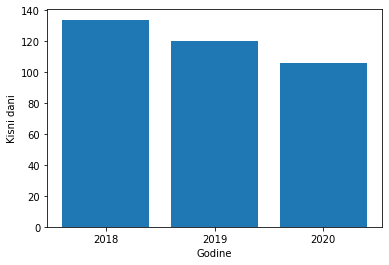

In [150]:
import re

#Trazimo stanja vremena gdje je jedno od sljedecih: rain, snow or rain and snow mixed, shower, thunderstorm
#Ako unos pocinje sa 6 ili 7 ili 8 ili 9, onda je tada bila kisa
pattern = "^[6789]"

#Unosi kada je padala kisa
#Uzima retke di je zabiljezena kisa
kisniUnosi18 = stanjeVremena18[ stanjeVremena18["OBSERVED_WEATHER1"].str.match(pattern) | stanjeVremena18["OBSERVED_WEATHER2"].str.match(pattern)]
kisniUnosi19 = stanjeVremena19[ stanjeVremena19["OBSERVED_WEATHER1"].str.match(pattern) | stanjeVremena19["OBSERVED_WEATHER2"].str.match(pattern)]
kisniUnosi20 = stanjeVremena20[ stanjeVremena20["OBSERVED_WEATHER1"].str.match(pattern) | stanjeVremena20["OBSERVED_WEATHER2"].str.match(pattern)]

#Uzmi samo dane
kisniDani18 = kisniUnosi18["DATE"].unique()
kisniDani19 = kisniUnosi19["DATE"].unique()
kisniDani20 = kisniUnosi20["DATE"].unique()

#Plot kisne dane
brojKisnihDana18 = kisniDani18.shape[0]
brojKisnihDana19 = kisniDani19.shape[0]
brojKisnihDana20 = kisniDani20.shape[0]

godine = list(["2018", "2019", "2020"])
kisniDani = list([brojKisnihDana18, brojKisnihDana19, brojKisnihDana20])

for i in range(3):
    print("U godini " + godine[i] + " je bilo " + str(kisniDani[i])  + " kisnih dana.")

import matplotlib.pyplot as plt

plt.bar(godine, kisniDani)
plt.xlabel("Godine")
plt.ylabel("Kisni dani")

**Broj kišnih dana po mjesecima**

Izračun broja kišnih dana za svaki mjesec u svim godinama te njihov tablični prikaz.

In [151]:
#Convert to list the to DateTimeIndex
kisniDani18 = list(kisniDani18)
kisniDani18 = pd.DatetimeIndex(data = kisniDani18)

kisniDani19 = list(kisniDani19)
kisniDani19 = pd.DatetimeIndex(data = kisniDani19)

kisniDani20 = list(kisniDani20)
kisniDani20 = pd.DatetimeIndex(data = kisniDani20)

##
#Count number of rain days for each month

#Dict to store
kisniDaniPoMjesecima18 = { 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0 }
kisniDaniPoMjesecima19 = { 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0 }
kisniDaniPoMjesecima20 = { 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0 }


for i in range(12):
    mjesec = kisniDani18[kisniDani18.month == i + 1]
    kisniDaniPoMjesecima18[i+1] = len(mjesec)

for i in range(12):
    mjesec = kisniDani19[kisniDani19.month == i + 1]
    kisniDaniPoMjesecima19[i+1] = len(mjesec)

for i in range(12):
    mjesec = kisniDani20[kisniDani20.month == i + 1]
    kisniDaniPoMjesecima20[i+1] = len(mjesec)

#Create numpy 2D array with values 
kisniDaniArrray = np.array([list(kisniDaniPoMjesecima18.values()), 
                            list(kisniDaniPoMjesecima19.values()),
                            list(kisniDaniPoMjesecima20.values())])
kisniDaniArrray = kisniDaniArrray.transpose()


kisniDaniArrray

kisniDaniPoMjesecima = pd.DataFrame(data = kisniDaniArrray, columns = ['2018', '2019', '2020'])
kisniDaniPoMjesecima.index += 1
kisniDaniPoMjesecima


,2018,2019,2020
1,11,8,4
2,15,5,6
3,19,4,9
4,9,13,4
5,16,16,10
6,8,6,13
7,15,9,11
8,6,6,10
9,7,9,9
10,10,10,14


**Broj oblačnih dana za svaku godinu**

Izračun oblačnih dana bez kiše te oblačnih dana sa kišom ili bez nje, usporedba podataka. Izračunata je vjerojatnost pada kiše ako je dan oblačan.

   Kisni dani  Oblacni dani bez kise  Oblacni dani, sa ili bez kise  Godina
0         134                     47                            181    2018
1         120                     19                            139    2019
2         106                     18                            124    2020
Vjerojatnost da će pasti kiša ako je dan oblačan: 0.8108108108108109


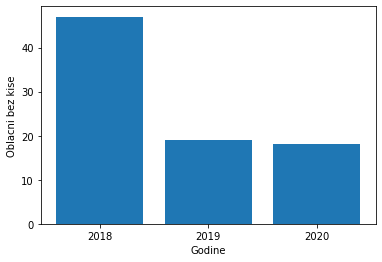

In [152]:
#Pattern za regex, unosi koji pocinju sa brojem 2
#2 u podacima predstavlja da su oblaci prekrivali vise od polovice neba
pattern2 = "^[2]"
pattern3 = "^[^6789]"

#Uzmi retke kada nije padala kisa
oblacniUnosi18 = stanjeVremena18[ stanjeVremena18["OBSERVED_WEATHER1"].str.match(pattern3) & stanjeVremena18["OBSERVED_WEATHER2"].str.match(pattern3) ] 
oblacniUnosi19 = stanjeVremena19[ stanjeVremena19["OBSERVED_WEATHER1"].str.match(pattern3) & stanjeVremena19["OBSERVED_WEATHER2"].str.match(pattern3)]
oblacniUnosi20 = stanjeVremena20[ stanjeVremena20["OBSERVED_WEATHER1"].str.match(pattern3) & stanjeVremena20["OBSERVED_WEATHER2"].str.match(pattern3)]

#Uzmi retke kada je bilo oblacno
oblacniUnosi18 = oblacniUnosi18[ oblacniUnosi18["OBSERVED_WEATHER1"].str.match(pattern2) | oblacniUnosi18["OBSERVED_WEATHER2"].str.match(pattern2)]
oblacniUnosi19 = oblacniUnosi19[ oblacniUnosi19["OBSERVED_WEATHER1"].str.match(pattern2) | oblacniUnosi19["OBSERVED_WEATHER2"].str.match(pattern2)]
oblacniUnosi20 = oblacniUnosi20[ oblacniUnosi20["OBSERVED_WEATHER1"].str.match(pattern2) | oblacniUnosi20["OBSERVED_WEATHER2"].str.match(pattern2)]

#Uzmi samo dane
oblacniDani18 = oblacniUnosi18["DATE"].unique()
oblacniDani19 = oblacniUnosi19["DATE"].unique()
oblacniDani20 = oblacniUnosi20["DATE"].unique()


brojOblacnihDana18 = oblacniDani18.shape[0]
brojOblacnihDana19 = oblacniDani19.shape[0]
brojOblacnihDana20 = oblacniDani20.shape[0]


oblacniDani = list([brojOblacnihDana18, brojOblacnihDana19, brojOblacnihDana20])


kisniDaniGodArray = np.array(kisniDani)
oblacniDaniBezKiseArray = np.array(oblacniDani)
oblacniDaniArray = np.array( [x + y for x, y in zip(kisniDani, oblacniDani)] )


daniUsporedbaArray = np.array([kisniDaniGodArray, oblacniDaniBezKiseArray, oblacniDaniArray, [2018, 2019, 2020]]).transpose()
daniUsporedbaDf = pd.DataFrame(data = daniUsporedbaArray, columns = ['Kisni dani', 'Oblacni dani bez kise', 'Oblacni dani, sa ili bez kise', 'Godina'])
print(daniUsporedbaDf)
plt.bar(godine, oblacniDaniBezKiseArray)
plt.ylabel("Oblacni bez kise")
plt.xlabel("Godine")
print("Vjerojatnost da će pasti kiša ako je dan oblačan: " + str(daniUsporedbaDf["Kisni dani"].mean() / daniUsporedbaDf["Oblacni dani, sa ili bez kise"].mean()) )
